<img src="../BD00-Datasets/img-datasets/ub_si.png" height="225" width="100%" />

# **N. W. Kusuma** || **`Big Data ~ PCA Assignmen`**
***
### In this notebook assignment, we are going to explore the House Sales in King County, USA dataset, preprocess it, and apply Principal Component Analysis model to classify the breast cancer as malignant or benign.
Principal Component Analysis (PCA) is:
* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* Unsupervised Machine Learning
* A transformation of your data and attempts to find out what features explain the most variance in our data.

***
# **Libraries & Settings**
***
## Import common libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Setting compiler options
***

In [2]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option("display.float_format", '{:.2f}'.format)

***
# About the Data
***
The breast cancer diagnosis is classified as either `benign` or `malignant` based on several observations/features.

* 30 features are used, examples:
    - `radius` (mean of distances from center to points on the perimeter)
    - `texture` (standard deviation of gray-scale values)
    - `perimeter`
    - `area`
    - `smoothness` (local variation in radius lengths)
    - `compactness` (perimeter^2 / area - 1.0)
    - `concavity` (severity of concave portions of the contour)
    - `concave points` (number of concave portions of the contour)
    - `symmetry` 
    - `fractal dimension` ("coastline approximation" - 1)
* Datasets are linearly separable using all 30 input features
* Number of Instances: 569
* Class Distribution: 212 Malignant, 357 Benign
* Target class:
    - `Malignant`
    - `Benign`

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0.00
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0.00
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0.00
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0.00
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0.00


***
# 1. **Exploratory Data Analysis**
***
## 1.1. Check for data types & missing values

In [4]:
print(f"Target Names: {cancer.target_names}, data dimension: {df.shape}\n")
df.info()

Target Names: ['malignant' 'benign'], data dimension: (569, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error     

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


## 1.2. Visualize the data
***

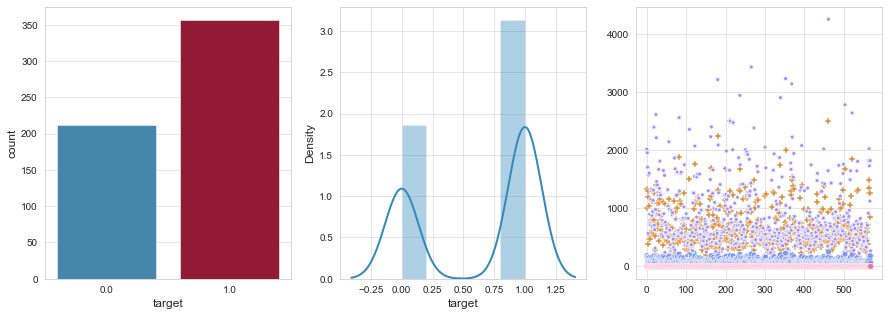

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.countplot(df['target'], label="Count")

plt.subplot(1,3,2)
sns.distplot(df['target'])

plt.subplot(1,3,3)
#sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df);
sns.scatterplot(data=df, legend=False);

df.columns

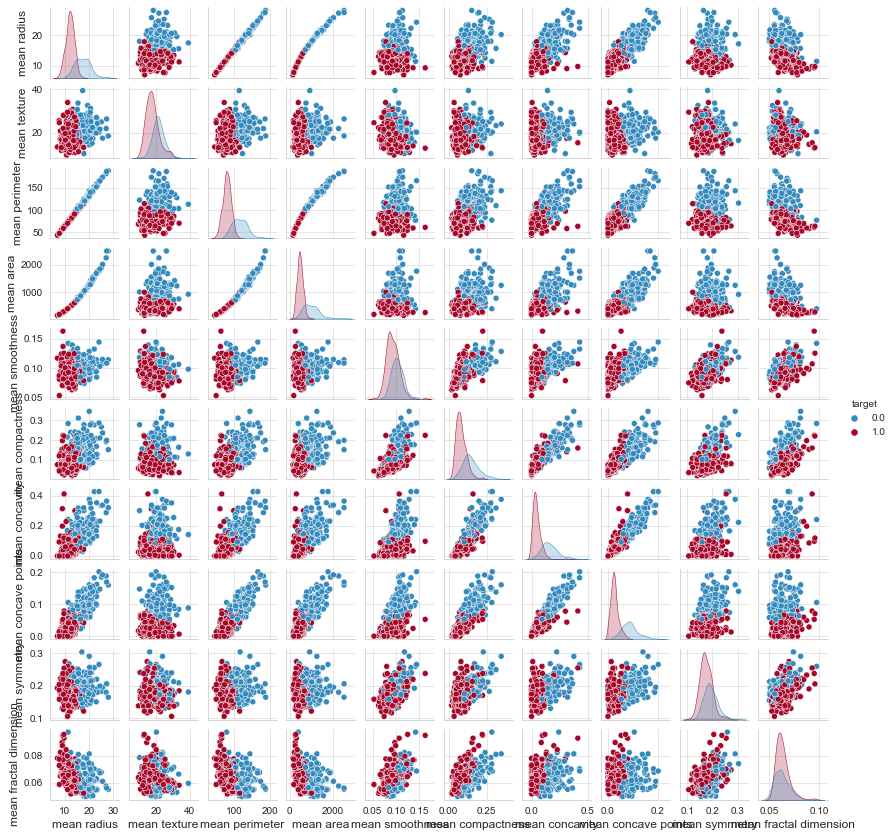

In [8]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'], height=1.18);

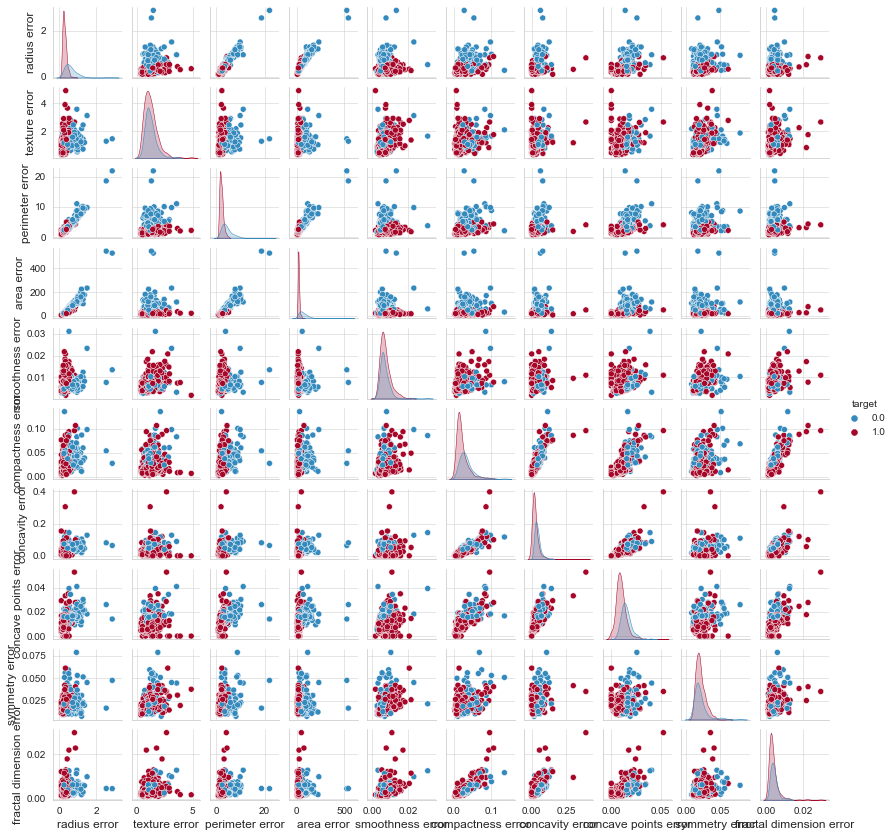

In [9]:
sns.pairplot(df, hue='target', vars=['radius error', 'texture error', 'perimeter error', 'area error',
                                     'smoothness error', 'compactness error', 'concavity error',
                                     'concave points error', 'symmetry error', 'fractal dimension error'], height=1.18);

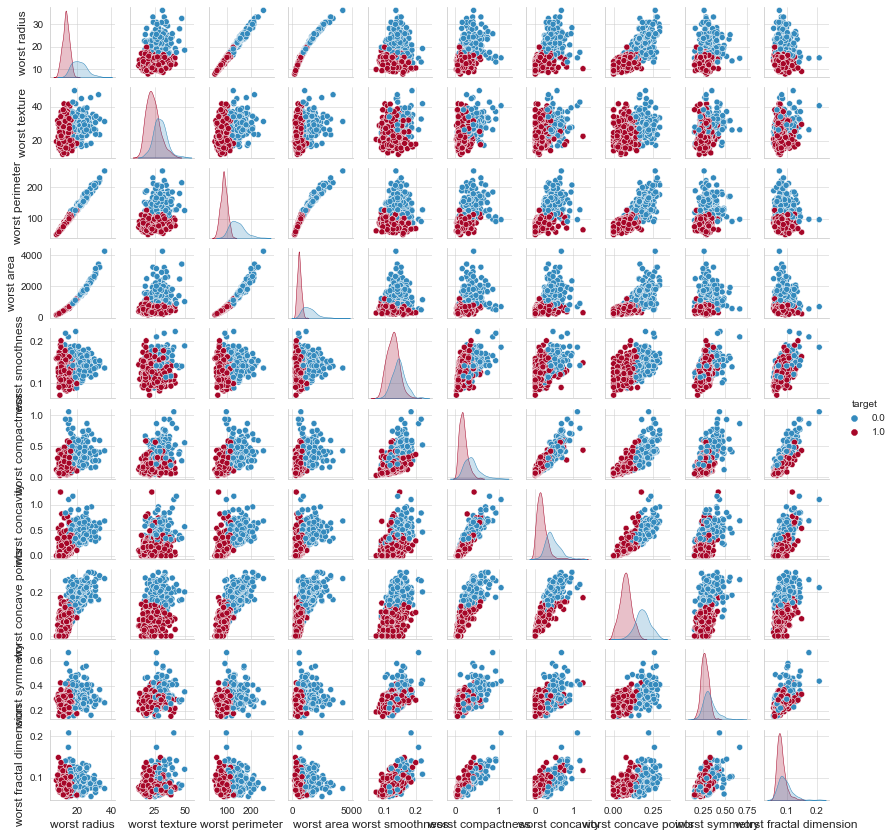

In [10]:
sns.pairplot(df, hue='target', vars=['worst radius', 'worst texture', 'worst perimeter', 'worst area',
                                     'worst smoothness', 'worst compactness', 'worst concavity',
                                     'worst concave points', 'worst symmetry', 'worst fractal dimension'], height=1.18);

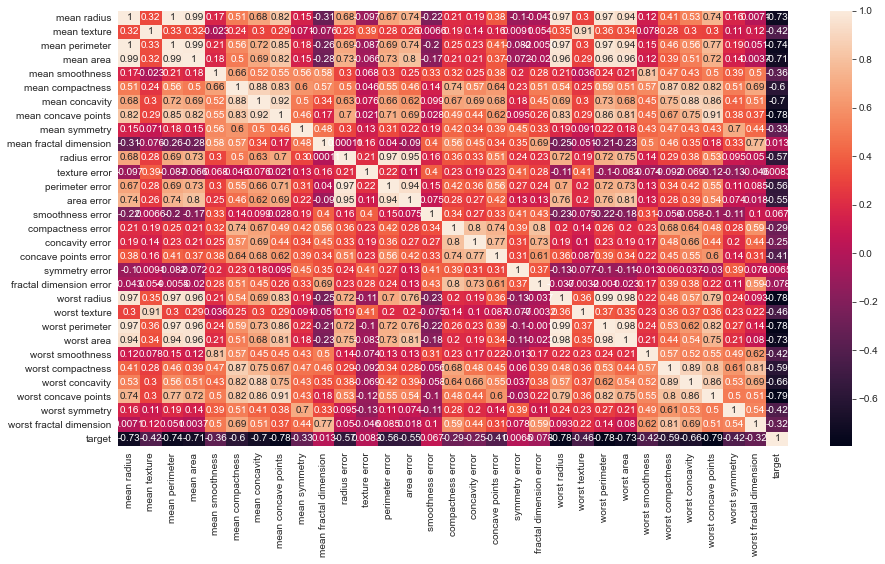

In [11]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(15,8)) 
sns.heatmap(df.corr(), annot=True);

***
# 2. Data Preprocessing
***
## 2.1. Assigning features

In [44]:
X = df.drop('target', axis=1)
y = df.target

## 2.2. Train Test Split
***

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print(f"Training set\t: {X_train.shape} {y_train.shape}\nTesting set\t: {X_test.shape} {y_test.shape}")

Training set	: (398, 30) (398,)
Testing set	: (171, 30) (171,)


## 2.3. Scaling X feature sets
***

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Scaled X Training set\t: {X_train.shape}\nScaled X Testing set\t: {X_test.shape}")

Scaled X Training set	: (398, 30)
Scaled X Testing set	: (171, 30)


## 3.1. Helper function for evaluating the scores
***
Calculating `Accuracy`, `Precision`, `Recall`, and `F1` scores

In [55]:
from sklearn import metrics

def print_eval(clf, X, y, train=True):
    try:
        pred = clf.predict(X)

        acc  = metrics.accuracy_score(y, pred)
        prec = metrics.precision_score(y, pred)
        rec  = metrics.recall_score(y, pred)
        f1   = metrics.f1_score(y, pred)
        cm   = metrics.confusion_matrix(y, pred)

    finally:
        if train:
            print(f"\n:: Training Result {'='*26}\n{'-'*45}")
        elif not train:         
            print(f"\n:: Testing Result {'='*27}\n{'-'*45}")

        print(f"Accuracy score: {acc:.5f}\n{'-'*45}")
        print(f"Classification Report:\n\tPrecision\t: {prec:.5f}\n\tRecall Score\t: {rec:.5f}\n\tF1 Score\t: {f1:.5f}\n{'-'*45}")
        print(f"Confusion Matrix:\n{cm}\n{'='*45}")      

***
# 3. Modeling
***
## 3.1. Model Building & Training
~ Principal Component Analysis (PCA) is:
* Used in exploratory data analysis (EDA) 
* Visualize genetic distance and relatedness between populations. 
* Data compression and information preservation 
* Visualization
* Noise filtering
* Feature extraction and engineering

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 3.2. PCA Attributes: 
***
### 3.2.1 Method:
- `Eigenvalue` decomposition of a data covariance (or correlation) matrix
- `Singular Value` decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.

:: PCA Explained Variance ========================
**************************************************
PCA Variance Ratio:
-------------------
[0.45657763 0.17979452 0.0924244 ]
PCA Singular Values:
--------------------
[73.83452347 46.33299627 33.21968317]
Cumulative Eigenvalues:
-----------------------
[0.45657763 0.63637214 0.72879655]
**************************************************


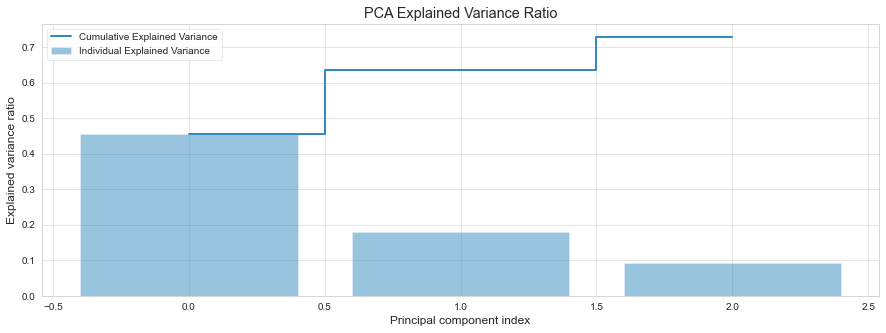

In [49]:
# Determine explained variance using explained_variance_ratio_ attribute
exp_var_pca = pca.explained_variance_ratio_

sin_val_pca = pca.singular_values_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print(f":: PCA Explained Variance {'='*24}")
print(f"{'*'*50}\nPCA Variance Ratio:\n{'-'*19}\n{exp_var_pca}")
print(f"{'='*50}\nPCA Singular Values:\n{'-'*20}\n{sin_val_pca}")
print(f"{'='*50}\nCumulative Eigenvalues:\n{'-'*23}\n{cum_sum_eigenvalues}\n{'*'*50}")

plt.figure(figsize=(15,5))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative Explained Variance')
plt.title("PCA Explained Variance Ratio")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best');

### 3.2.2. Output: **loadings**
***
- `Precision` scores, sometimes called **loadings** (the weight)

In [50]:
prec_pca = pca.get_precision()

print(f":: PCA Precision {'='*52}")
print(f"{'*'*69}\nPCA Precision:\n{'-'*14}\n{prec_pca[:3]}\n{'*'*69}")

:: PCA Precision ====================================================
*********************************************************************
PCA Precision:
--------------
[[ 2.98223992e+00 -1.22910627e-01 -3.19318002e-01 -3.25232014e-01
   5.71758146e-02 -5.76454232e-02 -1.30127513e-01 -2.02704975e-01
   5.58386718e-02  2.28439681e-01 -2.00975091e-01  6.83437151e-02
  -2.01367080e-01 -2.51492649e-01  1.53237518e-01  3.71716160e-02
   3.06479751e-02 -5.11309162e-02  1.27471852e-01  1.25737796e-01
  -3.26123181e-01 -1.14600591e-01 -3.16945910e-01 -3.21195160e-01
   4.86196274e-02 -5.03064524e-02 -9.74313934e-02 -1.90371495e-01
   1.83897464e-02  9.07569529e-02]
 [-1.22910627e-01  3.22906086e+00 -1.20240722e-01 -1.30325673e-01
   3.05133346e-02 -1.82829108e-02 -6.82713540e-02 -8.34781611e-02
   4.87147701e-03  7.77129308e-02 -1.68124757e-01 -1.11316008e-01
  -1.63650263e-01 -1.62066085e-01 -4.83792299e-02 -4.99480186e-02
  -6.27080102e-02 -1.02839269e-01 -6.13994420e-02 -3.80451524e-02
  -

### 3.2.3. Output: **factor scores**
***
- `Component` scores, **factor scores** (the transformed variable values)

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

These components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object.

In [43]:
comp_pca = pca.components_

print(f":: PCA Components {'='*60}")
print(f"{'*'*78}\nPCA Components:\n{'-'*15}\n{comp_pca[:3]}\n{'*'*78}")

:: PCA Components ============================================================
******************************************************************************
PCA Components:
---------------
[[ 0.21715933  0.10245329  0.22558525  0.21816044  0.13453045  0.23588998
   0.25413111  0.25679925  0.13455335  0.06579578  0.20533388  0.01191054
   0.21386436  0.21955433  0.01520765  0.17919408  0.16028458  0.18774697
   0.03187138  0.11423187  0.22663481  0.10796523  0.2346181   0.22345304
   0.1231048   0.20870317  0.22927325  0.24707194  0.1215912   0.13587326]
 [-0.23637709 -0.07492166 -0.2164902  -0.23331789  0.21068737  0.1514519
   0.06582137 -0.028309    0.20398851  0.37427067 -0.09262688  0.07820378
  -0.08396301 -0.14287746  0.20334445  0.21262502  0.18331587  0.09656514
   0.18373286  0.26616529 -0.22289976 -0.05289125 -0.20263115 -0.22082097
   0.19769525  0.14467379  0.09687661 -0.01220963  0.15370829  0.26707769]
 [-0.0151031   0.10019243 -0.01783671  0.01128038 -0.08728245 -0.0828

#### Interpreting the components: 
As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to pairs each two of the three principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. 

Clearly by comparing these pairs two components, we can easily separate these two classes.

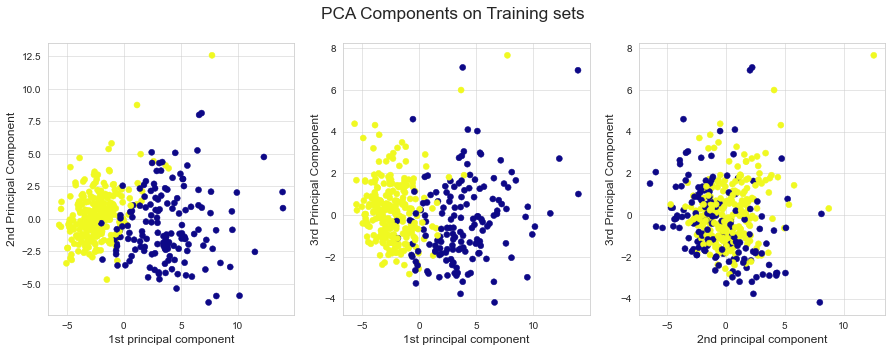

In [51]:
plt.figure(figsize=(15,5))
plt.suptitle("PCA Components on Training sets", fontsize='xx-large');

plt.subplot(1, 3, 1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
#plt.title("PCA: First PC - Second PC")
plt.xlabel("1st principal component")
plt.ylabel("2nd Principal Component");

plt.subplot(1,3,2)
plt.scatter(X_train[:,0],X_train[:,2],c=y_train,cmap='plasma')
#plt.title("PCA: First PC - Third PC")
plt.xlabel("1st principal component")
plt.ylabel("3rd Principal Component");

plt.subplot(1,3,3)
plt.scatter(X_train[:,1],X_train[:,2],c=y_train,cmap='plasma')
#plt.title("PCA: Second PC - Third PC")
plt.xlabel("2nd principal component")
plt.ylabel("3rd Principal Component");

***
# 4. Evaluation
***
## 4.1. Cross-validation
Hyper-Parameter tuning using gridsearch cross-validation for the best params with Support Vector Classivication

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5, iid=True)
grid.fit(X_train, y_train);

GridSearchCV(cv=5, estimator=SVC(), iid=True,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']})

## 4.2. Evaluation on Train Data
***

In [59]:
print_eval(grid, X_train, y_train, train=True)


:: Training Result ==========================
---------------------------------------------
Accuracy score: 0.94975
---------------------------------------------
Classification Report:
	Precision	: 0.94510
	Recall Score	: 0.97571
	F1 Score	: 0.96016
---------------------------------------------
Confusion Matrix:
[[137  14]
 [  6 241]]


## 4.3. Evaluation on Test Data
***

In [60]:
#print_eval(grid, X_train, y_train, train=True)
print_eval(grid, X_test, y_test, train=False)


:: Testing Result ===========================
---------------------------------------------
Accuracy score: 0.97076
---------------------------------------------
Classification Report:
	Precision	: 0.96460
	Recall Score	: 0.99091
	F1 Score	: 0.97758
---------------------------------------------
Confusion Matrix:
[[ 57   4]
 [  1 109]]
